In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from datasets import load_dataset

In [78]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [10]:
dataset = load_dataset("dair-ai/emotion")
train = dataset['train']
val = dataset['validation']
test = dataset['test']


In [19]:
def get_posts(data):
    posts = [x ['text'] for x in data]
    labels = [x ['label'] for x in data]
    return posts, labels


In [35]:
def get_sequences(tokenizer, tweets, maxlen):
  # making all sequences same length
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, 
    truncating = 'post', 
    padding='post', 
    maxlen=maxlen)
  return padded

In [63]:
train_posts, train_labels = get_posts(train)
train_posts[0], train_labels[0]

('i didnt feel humiliated', 0)

In [64]:
unique_elements = set(train_labels)

# Convert the set back to a list if needed
unique_elements_list = list(unique_elements)

print(unique_elements_list)

[0, 1, 2, 3, 4, 5]


In [54]:
token = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<UNK>')
token.fit_on_texts(train_posts)

In [55]:
token.fit_on_texts(train_posts)
print(train_posts[0])

token.texts_to_sequences([train_posts[0]])    

i didnt feel humiliated


[[2, 139, 3, 679]]

In [57]:
training_sequences = get_sequences(token, train_posts, 50)
training_sequences[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [110]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])
              

In [111]:
validation_posts, validation_labels = get_posts(val)
validation_sequences = get_sequences(token, validation_posts, 50)

In [112]:

history = model.fit(
    np.array(training_sequences), np.array(train_labels),
    validation_data=(np.array(validation_sequences), np.array(validation_labels)),
    epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)]
    )                               

Epoch 1/100
500/500 [==============================] - 18s 24ms/step - loss: 1.3235 - accuracy: 0.4807 - val_loss: 0.8799 - val_accuracy: 0.6575
Epoch 2/100
500/500 [==============================] - 11s 22ms/step - loss: 0.6406 - accuracy: 0.7602 - val_loss: 0.6374 - val_accuracy: 0.7780
Epoch 3/100
500/500 [==============================] - 11s 22ms/step - loss: 0.3822 - accuracy: 0.8696 - val_loss: 0.5317 - val_accuracy: 0.8225
Epoch 4/100
500/500 [==============================] - 11s 23ms/step - loss: 0.2361 - accuracy: 0.9193 - val_loss: 0.4426 - val_accuracy: 0.8505
Epoch 5/100
500/500 [==============================] - 12s 24ms/step - loss: 0.1579 - accuracy: 0.9486 - val_loss: 0.4500 - val_accuracy: 0.8645
Epoch 6/100
500/500 [==============================] - 12s 24ms/step - loss: 0.1125 - accuracy: 0.9634 - val_loss: 0.4570 - val_accuracy: 0.8695
Epoch 7/100
500/500 [==============================] - 12s 24ms/step - loss: 0.0923 - accuracy: 0.9713 - val_loss: 0.4418 - val_ac

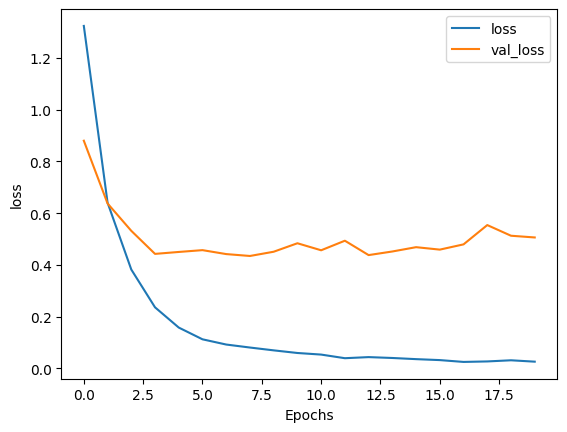

In [113]:
plot_graphs(history, 'loss')

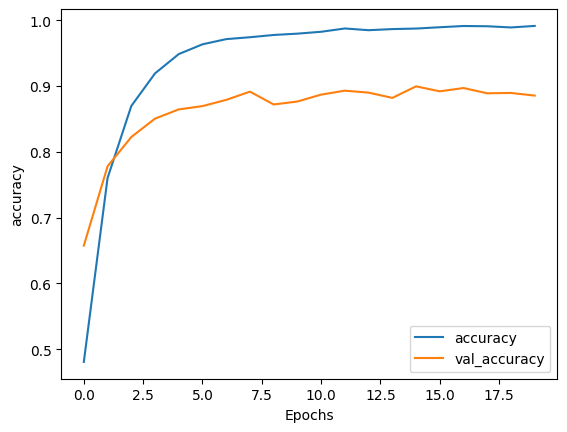

In [114]:
plot_graphs(history, 'accuracy')